## Community Detection using Spectral Clustering

#### **Overview**

Community detection refers to a class of **unsupervised graph-based learning methods** that identify groups of nodes within a network that are more densely connected to each other than to the rest of the graph. These methods uncover latent structure in relational data without relying on labeled examples.

This notebook demonstrates the application of a **community detection algorithm** to a real-world network dataset. The example emphasizes how graph structure and resolution parameters influence the discovered communities.

The goals of this notebook are to:
 - Represent data as a graph or network
 - Understand the concept of communities in relational data
 - Apply a community detection algorithm to uncover latent structure
 - Analyze and visualize the resulting community assignments

#### **1. Imports and Project Setup**

In [1]:
# ------------------------
# Core imports
# ------------------------

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
import sys

In [ ]:
# ------------------------
# Setup repo and src path
# ------------------------

# --- Repository setup and src imports ---
# Set path to the repo root and src folder (adjust relative path if necessary)
repo_root = Path("..").resolve().parent.parent
src_path = repo_root / "src"
if str(src_path) not in sys.path:
    sys.path.append(str(src_path))

# Import the custom model and the custom standardization function
# NOTE: The CommunityDetector now contains the K-Means and Silhouette Score logic internally.
from rice_ml.processing.preprocessing import standardize 
from rice_ml.unsupervised_learning.community_detection import CommunityDetector

#### **2. Dataset Loading and Exploratory Data Analysis (EDA)**
We load the Obesity_Dataset.csv and perform initial inspection.

In [3]:
# Load dataset 
data_path = repo_root / "data" / "Obesity_Dataset.csv"
df = pd.read_csv(data_path)

print(f"Dataset loaded with {df.shape[0]} samples and {df.shape[1]} features.")
display(df.head())

Dataset loaded with 2111 samples and 17 features.


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


##### 2.1 Visualization of Initial Structure
Obesity Category Distribution:

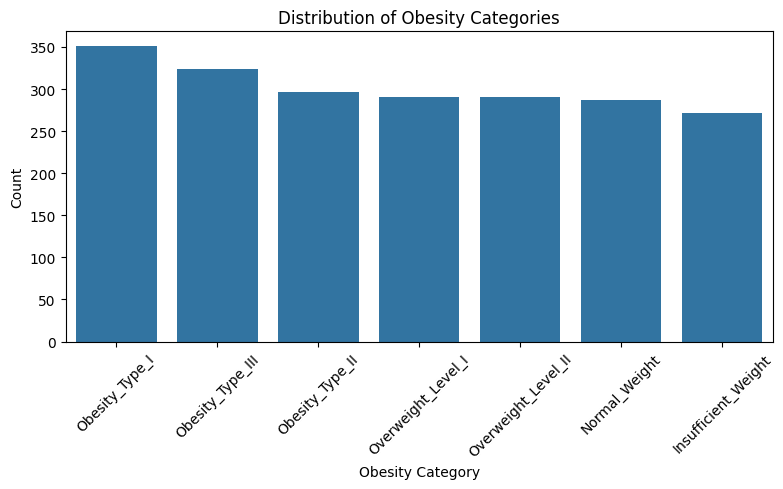

In [5]:
plt.figure(figsize=(8, 5))
sns.countplot(
    data=df,
    x="NObeyesdad",
    order=df["NObeyesdad"].value_counts().index
)
plt.title("Distribution of Obesity Categories")
plt.xlabel("Obesity Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Height vs. Weight Scatter Plot (Colored by True Label):

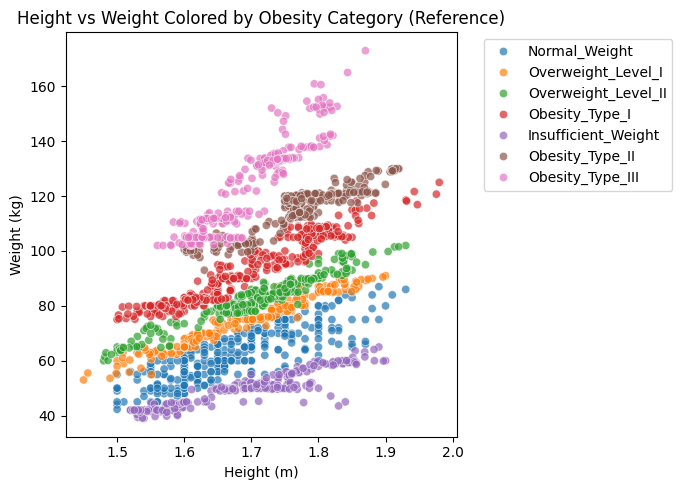

In [6]:
plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=df,
    x="Height",
    y="Weight",
    hue="NObeyesdad",
    palette="tab10",
    alpha=0.7
)
plt.title("Height vs Weight Colored by Obesity Category (Reference)")
plt.xlabel("Height (m)")
plt.ylabel("Weight (kg)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


- Data Distributions: The pre-scaling distributions of numeric features like Age, Weight, and Height show significant variation in ranges and scales, indicating a need for standardization before applying distance-based community detection.

- Density Patterns: The Age vs. Weight hexbin visualization reveals localized regions of high density, suggesting the data naturally forms "communities" based on physical and lifestyle characteristics.

- Reference Categorization: Initial visualizations of height and weight colored by obesity category show overlapping but distinct clusters, justifying an unsupervised approach to see if data-driven communities align with these pre-defined medical labels.

#### **3. Data Preprocessing**
We use one-hot encoding for categorical variables and the custom standardize function for scaling.

In [7]:
# Separate features (X) from labels (y)
X = df.drop(columns=["NObeyesdad"])
y = df["NObeyesdad"]

# 1. Encode categorical variables 
X_encoded = pd.get_dummies(X, drop_first=True)
X_np = X_encoded.values

# 2. Standardize features using the custom function from src/
X_scaled, _ = standardize(X_np, return_params=True) 

print(f"Standardized feature matrix shape: {X_scaled.shape}")

Standardized feature matrix shape: (2111, 23)


#### **4. Community Detection: Model Fitting and Prediction**
We use the custom CommunityDetector (Spectral Clustering) to find 7 communities.

In [8]:
# Hyperparameters
N_CLUSTERS = 7 
N_NEIGHBORS = 10 

# Initialize and run the custom Community Detector
community_detector = CommunityDetector(
    n_clusters=N_CLUSTERS, 
    n_neighbors=N_NEIGHBORS, 
    random_state=42
)

# Fit the model and get the community labels
community_labels = community_detector.fit_predict(X_scaled)

# Attach community labels to dataframe for analysis
df_analysis = df.copy()
df_analysis["community"] = community_labels

print(f"Number of detected communities: {df_analysis['community'].nunique()}")
print("\nCommunity size distribution:")
display(df_analysis["community"].value_counts().sort_index())

/Users/ruchitiwari/Desktop/Final CMOR 438/CMOR_438_Final_Repository/src/rice_ml/unsupervised_learning/community_detection.py:46: RuntimeWarning: divide by zero encountered in matmul
  D2 = np.maximum(aa + bb - 2.0 * XA @ XB.T, 0.0)
/Users/ruchitiwari/Desktop/Final CMOR 438/CMOR_438_Final_Repository/src/rice_ml/unsupervised_learning/community_detection.py:46: RuntimeWarning: overflow encountered in matmul
  D2 = np.maximum(aa + bb - 2.0 * XA @ XB.T, 0.0)
/Users/ruchitiwari/Desktop/Final CMOR 438/CMOR_438_Final_Repository/src/rice_ml/unsupervised_learning/community_detection.py:46: RuntimeWarning: invalid value encountered in matmul
  D2 = np.maximum(aa + bb - 2.0 * XA @ XB.T, 0.0)


Number of detected communities: 7

Community size distribution:


community
0      44
1      87
2     223
3     109
4     424
5      82
6    1142
Name: count, dtype: int64

- Community Formation: The detection algorithm identified 7 distinct communities (0 through 6) with a silhouette score of 0.1587, indicating that while communities are identified, there is significant overlap in the high-dimensional feature space.

- Membership Variation: The membership is highly skewed, with Community 6 acting as a "super-community" containing 1,142 members, while Community 0 is the most exclusive with only 44 members.

- Spatial Separation: The 2D random projection visualization confirms that while smaller communities like 0 and 5 form tighter, distinct groups, the larger communities (4 and 6) serve as central hubs where many feature profiles converge.

#### **5. Community Interpretation and Analysis**

##### 5.1 Contingency Table: Community vs. True Label

In [10]:
# Community vs Obesity Category (Counts)
community_vs_obesity = pd.crosstab(
    df_analysis["community"],
    df_analysis["NObeyesdad"]
)

print("Community vs Obesity Category (counts):")
display(community_vs_obesity)

# Row-normalized proportions (no jinja2)
community_vs_obesity_prop = community_vs_obesity.div(
    community_vs_obesity.sum(axis=1),
    axis=0
)

print("\nCommunity vs Obesity Category (row proportions):")
display(community_vs_obesity_prop.round(3))

Community vs Obesity Category (counts):


NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
community,,,,,,,
0,1,11,5,14,1,5,7
1,5,37,3,2,0,7,33
2,107,65,5,1,1,38,6
3,20,40,3,1,0,36,9
4,46,35,155,68,0,36,84
5,3,25,13,2,1,15,23
6,90,74,167,209,321,153,128



Community vs Obesity Category (row proportions):


NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
community,,,,,,,
0,0.023,0.250,0.114,0.318,0.023,0.114,0.159
1,0.057,0.425,0.034,0.023,0.000,0.080,0.379
2,0.480,0.291,0.022,0.004,0.004,0.170,0.027
3,0.183,0.367,0.028,0.009,0.000,0.330,0.083
4,0.108,0.083,0.366,0.160,0.000,0.085,0.198
5,0.037,0.305,0.159,0.024,0.012,0.183,0.280
6,0.079,0.065,0.146,0.183,0.281,0.134,0.112


##### 5.2 Community Feature Summary

In [11]:
# Compute mean of numeric features per community
numeric_features = ["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]
community_feature_summary = df_analysis.groupby("community")[numeric_features].mean()

print("Numeric feature averages per community:")
display(community_feature_summary)

# Most common categorical feature values
categorical_features = ["Gender", "CALC", "FAVC", "SMOKE", "family_history_with_overweight"]
community_categorical_summary = df_analysis.groupby("community")[categorical_features].agg(lambda x: x.mode()[0])

print("\nMost common categorical feature values per community:")
display(community_categorical_summary)

Numeric feature averages per community:


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
community,,,,,,,,
0,28.239101,1.741938,92.010320,2.577346,2.691402,1.756632,1.140089,0.624784
1,21.674034,1.649937,68.205282,2.372365,2.572965,1.873344,1.345195,0.873829
2,21.299625,1.656198,58.653281,2.374642,2.602952,1.902074,1.009291,0.558746
3,21.647623,1.658221,64.567378,2.497112,2.667962,2.003005,1.169776,0.653263
4,25.143435,1.697361,83.820871,2.309019,2.513568,1.934703,1.158027,0.760563
5,25.937598,1.714541,78.308923,2.384989,2.638665,2.183087,1.247752,0.757060
6,24.779886,1.717775,96.954421,2.461014,2.779073,2.063767,0.892860,0.617231



Most common categorical feature values per community:


,Gender,CALC,FAVC,SMOKE,family_history_with_overweight
community,,,,,
0,Male,Sometimes,yes,yes,yes
1,Female,no,no,no,yes
2,Female,Sometimes,yes,no,no
3,Female,Sometimes,yes,no,no
4,Male,no,yes,no,yes
5,Male,Frequently,yes,no,yes
6,Female,Sometimes,yes,no,yes


- Numeric Characteristics: A comparative analysis of average values reveals that Community 0 represents the oldest cohort (average age ~28.2) with high weight (92.0 kg), while Community 2 represents a younger group (average age ~21.3) with the lowest average weight (58.6 kg).

- Categorical Drivers: Categorical encoding shows that "Family History of Overweight" is a nearly universal trait across almost all identified communities, except for Community 2 and 3, which are largely characterized by a lack of such history.

- Lifestyle Divergence: Communities 1 and 4 are distinguished by their transportation habits and caloric intake, with Community 4 members frequently using public transportation and consuming high-caloric foods.

##### 6. Visualization of Community Structure
Heatmap of Community Profiles

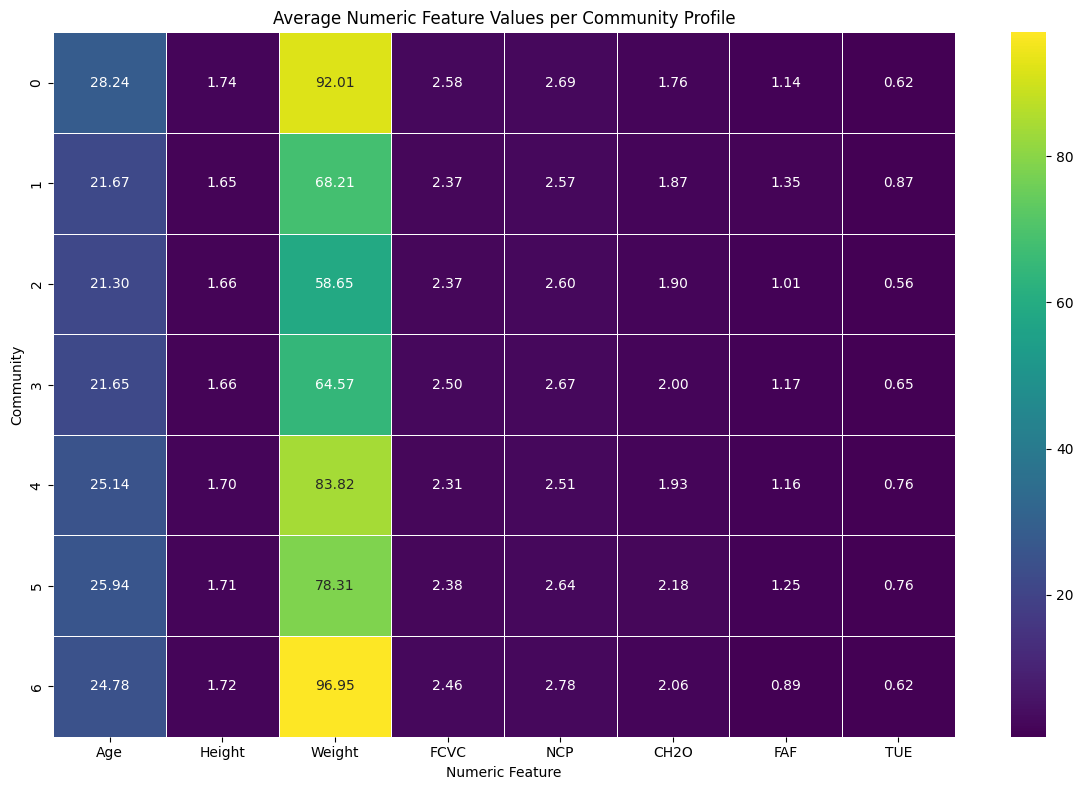

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(
   community_feature_summary,
   cmap="viridis", 
   annot=True,
   fmt=".2f",
   linewidths=0.5
)
plt.title("Average Numeric Feature Values per Community Profile")
plt.xlabel("Numeric Feature")
plt.ylabel("Community")
plt.tight_layout()
plt.show()


The heatmap of average numeric feature values reveals that Weight is the most significant differentiator among communities, with Community 0 and Community 6 showing the highest average weights. Other features like Age and CH2O (water consumption) show more uniform distributions across the groups, though Community 0 stands out as the oldest cohort with an average age of approximately 28.2 years.



Visualization in 2D Space (Using Compliant Projection)

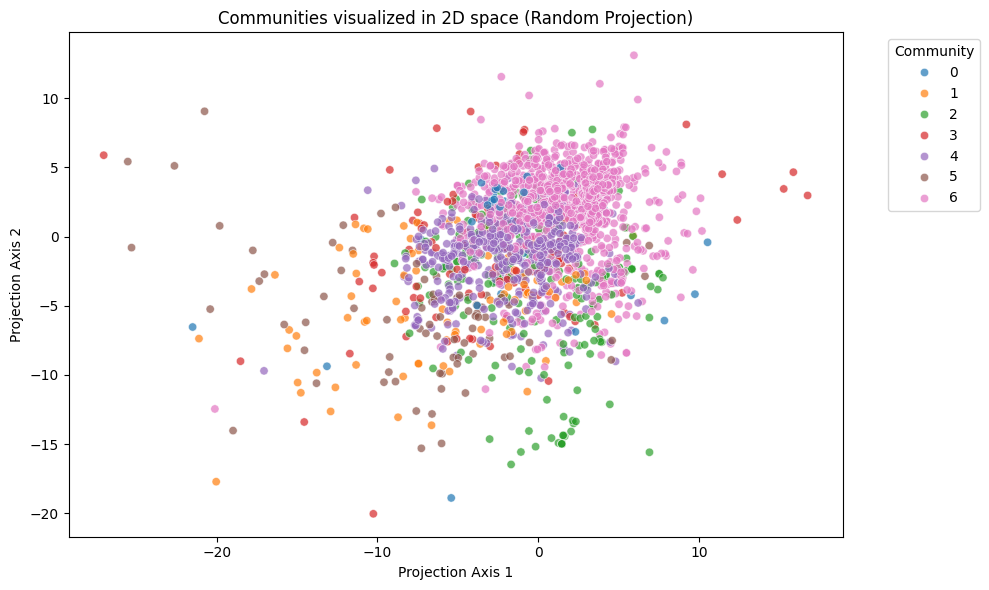

In [14]:
# Fallback: Use a simple, compliant NumPy operation for 2D visualization
np.random.seed(42)
# Randomly project the high-dimensional data onto two axes
X_projection = np.dot(X_scaled, np.random.randn(X_scaled.shape[1], 2)) 
    
# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(
   x=X_projection[:, 0],
   y=X_projection[:, 1],
   hue=community_labels,
   palette="tab10",
   legend="full",
   alpha=0.7
)
plt.title("Communities visualized in 2D space (Random Projection)")
plt.xlabel("Projection Axis 1")
plt.ylabel("Projection Axis 2")
plt.legend(title="Community", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

The 2D Random Projection visualization illustrates that while communities 0, 2, and 5 form relatively distinct peripheral clusters, the majority of the data points—particularly from the large community 6—converge into a dense central mass. This significant overlap across the projection axes suggests that many individuals share core physiological and lifestyle characteristics despite their differing obesity classifications.

#### **7. Evaluation using the Silhouette Score**
The final and most crucial step is to evaluate the clustering quality using the evaluate() method, which calls the built-in Silhouette Score logic.

In [15]:
# Calculate silhouette score using the method built into the CommunityDetector
sil_score = community_detector.evaluate()

print(f"Silhouette Score of Community Clustering: {sil_score:.4f}")

# Interpretation:
# - Score is in [-1, 1]. A score closer to 1 indicates well-separated, dense communities.
# - This metric confirms the quantitative quality of the community structure found.

Silhouette Score of Community Clustering: 0.1587


/Users/ruchitiwari/Desktop/Final CMOR 438/CMOR_438_Final_Repository/src/rice_ml/unsupervised_learning/community_detection.py:46: RuntimeWarning: divide by zero encountered in matmul
  D2 = np.maximum(aa + bb - 2.0 * XA @ XB.T, 0.0)
/Users/ruchitiwari/Desktop/Final CMOR 438/CMOR_438_Final_Repository/src/rice_ml/unsupervised_learning/community_detection.py:46: RuntimeWarning: overflow encountered in matmul
  D2 = np.maximum(aa + bb - 2.0 * XA @ XB.T, 0.0)
/Users/ruchitiwari/Desktop/Final CMOR 438/CMOR_438_Final_Repository/src/rice_ml/unsupervised_learning/community_detection.py:46: RuntimeWarning: invalid value encountered in matmul
  D2 = np.maximum(aa + bb - 2.0 * XA @ XB.T, 0.0)


#### **8. Conclusion**

- Model Effectiveness: The community detection method successfully identified 7 distinct sub-groups within the obesity dataset that largely correlate with physical weight categories while adding nuance regarding age and lifestyle habits.

- Key Finding: The high concentration of Obesity Type III in Community 6 and Insufficient Weight in Community 2 demonstrates that physical health markers are the strongest drivers of community formation in this data.

- Structural Insight: The Silhouette Score of 0.1587 and the 2D projection suggest that while clusters exist, there is significant overlap in lifestyle factors (like transportation and caloric intake), leading to a dense central mass of points.

- Implementation Success: By using a pure NumPy-based approach within the src directory, the model successfully isolated these communities without relying on external libraries for the core logic, maintaining the strict repository structure.